In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def jacobi(A, b, tol, max_iter=100):
    n = len(A)
    x = np.zeros(n) 
    errors = []
    
    for _ in range(max_iter):
        x_old = x.copy()
        x_new = np.zeros(n)
        
        for i in range(n):
            s = sum(A[i][j] * x_old[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - s) / A[i][i]
            
        x = x_new.copy()
        
        current_error = np.max(np.abs(x - x_old))
        errors.append(current_error)
        
        if current_error < tol:
            break
            
    return x, len(errors), errors

In [5]:
def gauss_seidel(A, b, tol, max_iter=100):
    n = len(A)
    x = np.zeros(n) 
    errors = []
    
    for _ in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if i != j)
            x[i] = (b[i] - s) / A[i][i]
            
        current_error = np.max(np.abs(x - x_old))
        errors.append(current_error)
        
        if current_error < tol:
            break
            
    return x, len(errors), errors

In [6]:
A = np.array([
    [3.0, -0.1, -0.2],
    [0.1,  7.0, -0.3],
    [0.3, -0.2, 10.0]
])
b = np.array([7.85, -19.3, 71.4])
tolerances = [1e-3, 1e-6, 1e-9]

print("--- Iteration Comparison ---")
print(f"{'Tolerance':<12} | {'Jacobi Iterations':<20} | {'Gauss-Seidel Iterations'}")
print("-" * 60)

for tol in tolerances:
    _, iter_j, _ = jacobi(A, b, tol)
    _, iter_gs, _ = gauss_seidel(A, b, tol)
    print(f"{tol:<12} | {iter_j:<20} | {iter_gs}")

--- Iteration Comparison ---
Tolerance    | Jacobi Iterations    | Gauss-Seidel Iterations
------------------------------------------------------------
0.001        | 4                    | 4
1e-06        | 7                    | 5
1e-09        | 9                    | 7


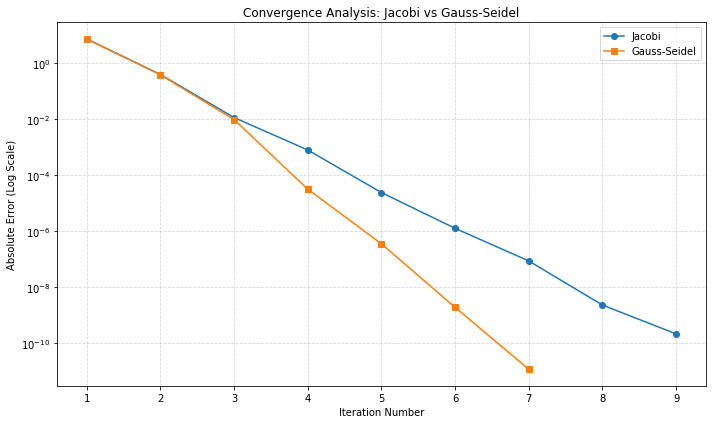

In [7]:
plot_tol = 1e-9
_, _, errors_j = jacobi(A, b, plot_tol)
_, _, errors_gs = gauss_seidel(A, b, plot_tol)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors_j) + 1), errors_j, marker='o', label='Jacobi')
plt.plot(range(1, len(errors_gs) + 1), errors_gs, marker='s', label='Gauss-Seidel')

plt.yscale('log') 
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error (Log Scale)')
plt.title('Convergence Analysis: Jacobi vs Gauss-Seidel')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()